In [ ]:
# exploro los datos, convierto datos a numerico, miro si hay variables con alta correlación
# entreno algoritmos de ML, tuneo hiperparámetros, saco métricas
# entreno con todos los datos
# tengo que tener un dataframe compatible con predict (y en predict hacer ls mismas modificaciones que he hecho en train)
# acabo de entender que lo que hay que entregar es la columna "y_pred" que saquemos del dataset de "predict"

In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [78]:
diamonds = pd.read_csv("train.csv")

In [79]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.71,Fair,F,SI1,57.0,68.0,6.05,5.87,3.40,2198
1,1,0.75,Premium,F,VVS2,62.4,57.0,5.88,5.75,3.63,3822
2,2,0.70,Good,H,VS2,59.1,65.0,5.75,5.85,3.43,2234
3,3,1.75,Premium,I,VS1,60.6,60.0,7.80,7.84,4.74,12416
4,4,1.18,Premium,G,VVS2,59.7,58.0,6.94,6.90,4.13,9537


In [80]:
diamonds.isnull().sum() # nada que dropear

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [81]:
diamonds.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
40450    False
40451    False
40452    False
40453    False
40454    False
Length: 40455, dtype: bool

In [82]:
diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [83]:
diamonds.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [84]:
diamonds.corr().price.sort_values(ascending=False)

price    1.000000
carat    0.921326
x        0.883607
y        0.857871
z        0.854633
table    0.125362
id       0.008223
depth   -0.006708
Name: price, dtype: float64

In [85]:
import seaborn as sns

<AxesSubplot:xlabel='price', ylabel='Count'>

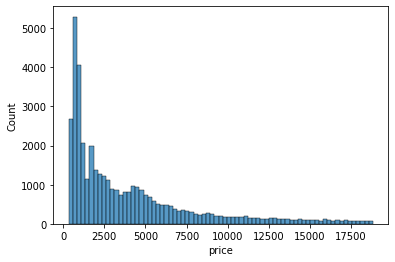

In [86]:
sns.histplot(diamonds.price)

<AxesSubplot:>

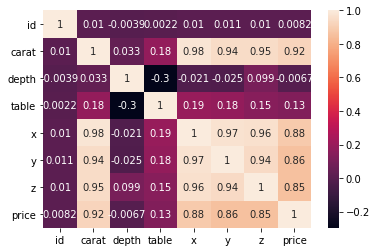

In [87]:
sns.heatmap(diamonds.corr(), annot=True)

In [88]:
# highest positive correlation: 0.98 between 'carat' & 'y' or 'carat' & 'x'
# highest negative correlation: -0.3 between 'table' & 'depth'

In [89]:
diamonds.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,0.010151,-0.003857,0.002187,0.010049,0.010914,0.010328,0.008223
carat,0.010151,1.000000,0.033034,0.180940,0.975477,0.944840,0.947467,0.921326
depth,-0.003857,0.033034,1.000000,-0.296561,-0.020998,-0.025284,0.099237,-0.006708
table,0.002187,0.180940,-0.296561,1.000000,0.194588,0.181557,0.148807,0.125362
x,0.010049,0.975477,-0.020998,0.194588,1.000000,0.966894,0.964365,0.883607
y,0.010914,0.944840,-0.025284,0.181557,0.966894,1.000000,0.939809,0.857871
z,0.010328,0.947467,0.099237,0.148807,0.964365,0.939809,1.000000,0.854633
price,0.008223,0.921326,-0.006708,0.125362,0.883607,0.857871,0.854633,1.000000


In [90]:
# considero que me sobran las columnas 'depth', 'table' y 'id' asique hago drop()

In [91]:
diamonds.drop(columns=["id","depth","table"], inplace=True)

In [92]:
diamonds.head()

,carat,cut,color,clarity,x,y,z,price
0,0.71,Fair,F,SI1,6.05,5.87,3.40,2198
1,0.75,Premium,F,VVS2,5.88,5.75,3.63,3822
2,0.70,Good,H,VS2,5.75,5.85,3.43,2234
3,1.75,Premium,I,VS1,7.80,7.84,4.74,12416
4,1.18,Premium,G,VVS2,6.94,6.90,4.13,9537


In [93]:
# hay que acordarse luego de quitar esas columnas en el dataset de test
# ahora hay que volver a fijarse en el tipo de objetos, en ML solo queremos variables numéricas

In [94]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
x          float64
y          float64
z          float64
price        int64
dtype: object

In [95]:
# los objetos hay que convertirlos

In [96]:
diamonds.clarity.unique()

array(['SI1', 'VVS2', 'VS2', 'VS1', 'VVS1', 'I1', 'SI2', 'IF'],
      dtype=object)

In [97]:
diamonds.cut.unique()

array(['Fair', 'Premium', 'Good', 'Very Good', 'Ideal'], dtype=object)

In [98]:
diamonds.color.unique()

array(['F', 'H', 'I', 'G', 'J', 'E', 'D'], dtype=object)

In [99]:
diamonds['color'].value_counts()

G    8497
E    7340
F    7171
H    6215
D    5111
I    4012
J    2109
Name: color, dtype: int64

In [100]:
train = pd.get_dummies(diamonds)
train.head()

,carat,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.71,6.05,5.87,3.40,2198,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.75,5.88,5.75,3.63,3822,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.70,5.75,5.85,3.43,2234,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.75,7.80,7.84,4.74,12416,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,1.18,6.94,6.90,4.13,9537,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
# ahora está ready para ML o eso creo

In [102]:
# ahora que train está bien, pasamos al dataset de test

In [103]:
diamond_test = pd.read_csv("predict.csv")
diamond_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.54,Premium,E,VS2,61.3,59.0,5.26,5.21,3.21
1,1,0.32,Ideal,J,VS2,62.1,54.0,4.38,4.44,2.74
2,2,0.30,Good,H,VVS2,63.6,56.0,4.26,4.29,2.72
3,3,0.66,Very Good,F,SI1,59.2,58.0,5.69,5.72,3.38
4,4,0.42,Ideal,F,VS2,62.0,55.0,4.79,4.82,2.98


In [104]:
# quitamos las columnas que ya no tenemos en el de train

In [105]:
diamond_test.drop(columns=["depth","table","id"], inplace=True)

In [108]:
# la unica columna que les diferencia es evidentemente 'price' en la de train

In [109]:
X = train.drop(columns = ["price"])
y = train["price"]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [128]:
X_train.shape

(32364, 24)

In [129]:
y_train.shape

(32364,)

In [130]:
X_test.shape

(8091, 24)

In [131]:
y_test.shape

(8091,)

In [ ]:
# shape is compatible

In [111]:
regr = RandomForestRegressor(n_estimators = 1000, max_depth = 6 )
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=1000)

In [112]:
y_pred = regr.predict(X_test)

In [114]:
import numpy as np

In [115]:
np.sqrt(mse(y_test, y_pred))

1038.567821061836

In [117]:
rfc = RandomForestRegressor()

In [118]:
grid = GridSearchCV(rfc, {"n_estimators":[100,200,400]})

In [119]:
regr = RandomForestRegressor(n_estimators = 1000, max_depth = 4)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [120]:
y_pred = regr.predict(X_test)
np.sqrt(mse(y_test, y_pred))

1255.0932994399766

In [121]:
y_pred = regr.predict(test)

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

In [126]:
# Accuracy: predicciones correctas
accuracy= accuracy_score(y_test, y_pred)

# precision: cuantas veces lo que dice mi modelo es cierto
precision= precision_score(y_test, y_pred)

# exhaustividad/recall: cantidad en que el modelo puede identificar la verdad
recall = recall_score(y_test, y_pred)

# f1: recall y orecision combinados
f1 = f1_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [8091, 13485]

In [127]:
print("Accuracy= ", round(accuracy,4))
print("Precision= ", round(precision,4))
print("Recall= ", round(recall,4))
print("F1= ", round(f1,4))

NameError: name 'accuracy' is not defined